In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.utils import shuffle
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import svm


Using TensorFlow backend.


In [2]:
excel_data = pd.read_excel('data/oczyszczone.xls', sheet_name = 'daneSOB')
headers = excel_data.columns.values
excel_data.head()

,Płeć,Wiek,Lokalizacja bólu na początku zachorowania,Lokalizacja bólu obecnie,Intensywność bólu,Czynniki nasilające ból,Czynniki przynoszące ulgę,Progresja bólu,Czas trwania bólu,Charakter bólu na początku zachorowania,...,Tętno,Ruchy oddechowe powłok brzusznych,Wzdęcia,Umiejscowienie bolesności uciskowej,Objaw Blumberga,Obrona mięśniowa,Wzmożone napięcie powłok brzusznych,Opory patologiczne,Objaw Murphy'ego,Klasy diagnozy
0,2,5,7,7,1,3,2,1,3,2,...,5,2,2,8,2,1,2,2,1,1
1,2,5,4,1,3,3,1,2,3,2,...,7,2,1,3,2,1,1,2,1,1
2,2,3,4,5,2,3,2,3,4,2,...,4,1,2,2,1,2,1,1,1,1
3,2,5,7,2,1,3,1,2,2,2,...,7,2,1,11,2,2,2,1,1,1
4,2,3,4,11,2,3,3,2,3,1,...,4,1,2,6,2,1,2,2,2,1


In [3]:
excel_data.groupby('Klasy diagnozy').size()


Klasy diagnozy
1    141
2     17
3     29
4     28
5     55
6     32
7    157
8     17
dtype: int64

In [4]:
diagnosis_classes = len(excel_data.groupby('Klasy diagnozy').size())
diagnosis_classes = [ str(x + 1) for x in range(diagnosis_classes)]
diagnosis_classes

['1', '2', '3', '4', '5', '6', '7', '8']

In [5]:
excel_data = shuffle(excel_data)
# one hot encoding
for i in headers:
    le = LabelEncoder()
    le.fit(excel_data[str(i)])
    excel_data[str(i)] = le.transform(excel_data[str(i)])
    encoded = to_categorical(excel_data[str(i)])
    
    if len(encoded[0]) > 2 and i != 'Klasy diagnozy':
        insert_loc = np.where(headers==i)
        insert_loc = insert_loc[0][0]

        excel_data = excel_data.drop(columns = i)
        for label in range(len(encoded[0])):
            excel_data.insert(int(insert_loc), str(i) + "_" + str(label), encoded[:,label])
    

excel_data.head()


,Płeć,Wiek_4,Lokalizacja bólu na początku zachorowania_10,Lokalizacja bólu obecnie_10,Intensywność bólu_2,Czynniki nasilające ból_3,Czynniki przynoszące ulgę_2,Progresja bólu_2,Czas trwania bólu_3,Charakter bólu na początku zachorowania_2,...,Poprzednie operacje brzuszne,Leki,Ruchy oddechowe powłok brzusznych,Wzdęcia,Objaw Blumberga,Obrona mięśniowa,Wzmożone napięcie powłok brzusznych,Opory patologiczne,Objaw Murphy'ego,Klasy diagnozy
444,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,6
295,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,1,1,5
59,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,1,1,1,0,0,0,0
156,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,0,1
155,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,1,1


In [6]:
# sc = StandardScaler() 
# data = sc.fit_transform(excel_data)
# scaled_df = pd.DataFrame(excel_data, columns=headers)

# for i in headers:
#     excel_data[str(i)]= scaled_df[str(i)]
# data[' Age '], data['Alkphos'], data['sgpt'], data['sgot'],data['TP'],data['ALB'],data['TB'],data['DB'] = dt[' Age '], dt['Alkphos'], dt['sgpt'], dt['sgot'] ,dt['TP'],dt['ALB'],dt['TB'],dt['DB']
#data[' Age '] = dt[' Age ']

In [7]:
# X_data set with arguments
# Y_data set with diagnostick class

Y_data = excel_data['Klasy diagnozy']
X_data = excel_data.drop(columns = 'Klasy diagnozy')

In [8]:
X_data.head()

,Płeć,Wiek_4,Lokalizacja bólu na początku zachorowania_10,Lokalizacja bólu obecnie_10,Intensywność bólu_2,Czynniki nasilające ból_3,Czynniki przynoszące ulgę_2,Progresja bólu_2,Czas trwania bólu_3,Charakter bólu na początku zachorowania_2,...,Żółtaczka w przeszłości,Poprzednie operacje brzuszne,Leki,Ruchy oddechowe powłok brzusznych,Wzdęcia,Objaw Blumberga,Obrona mięśniowa,Wzmożone napięcie powłok brzusznych,Opory patologiczne,Objaw Murphy'ego
444,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
295,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,0,0,0,1,1
59,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,1,1,0,0,0
156,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
155,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,1,0,0,1


In [9]:
# Zastanowić się nad dzieleniem zbioru wg klas diagnozy
# def shuffle_by_diagnostic_class(excel_data):
#    pass
  
# shuffle_by_diagnostic_class(excel_data)    

In [10]:
# ratio 1/2 to 1/2
X_train = X_data[:238]
Y_train = Y_data[:238]

X_test = X_data[238:]
Y_test = Y_data[238:]

kfold = [[X_train, Y_train, X_test, Y_test], [ X_test, Y_test, X_train, Y_train]]
cvscores = []

number_of_neurons = int(input("Podaj liczbę neuronów: "))
momentum_value = float(input("Podaj wartość momentum, wartość zero oznacza brak momentu, dopuszczalne liczby zmiennoprzecinkowe: "))


model = Sequential()
model.add(Dense(units = 32,activation = 'relu',input_dim = 106)) # warstwa wejściowa
model.add(Dense(units = number_of_neurons, activation = 'relu')) # warstwa ukryta
model.add(Dense(units = 8,kernel_initializer= 'normal', activation = 'softmax')) # warstwa wyjściowa

Podaj liczbę neuronów: 100
Podaj wartość momentum, wartość zero oznacza brak momentu, dopuszczalne liczby zmiennoprzecinkowe: 0


In [11]:
for X_train, Y_train, X_test, Y_test in kfold:
   

    model.compile(optimizer= SGD(lr = 0.07, momentum=momentum_value),loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
    model.fit(X_train, Y_train, epochs = 30,shuffle = True, verbose = 2, validation_data=(X_test, Y_test))
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


Train on 238 samples, validate on 238 samples
Epoch 1/30
 - 0s - loss: 2.0470 - acc: 0.2143 - val_loss: 1.9384 - val_acc: 0.3319
Epoch 2/30
 - 0s - loss: 1.8983 - acc: 0.3235 - val_loss: 1.8093 - val_acc: 0.3319
Epoch 3/30
 - 0s - loss: 1.7857 - acc: 0.3319 - val_loss: 1.7145 - val_acc: 0.3361
Epoch 4/30
 - 0s - loss: 1.6989 - acc: 0.3277 - val_loss: 1.6514 - val_acc: 0.3529
Epoch 5/30
 - 0s - loss: 1.6356 - acc: 0.3613 - val_loss: 1.5988 - val_acc: 0.4286
Epoch 6/30
 - 0s - loss: 1.5784 - acc: 0.4160 - val_loss: 1.5428 - val_acc: 0.4790
Epoch 7/30
 - 0s - loss: 1.5103 - acc: 0.5210 - val_loss: 1.4779 - val_acc: 0.4538
Epoch 8/30
 - 0s - loss: 1.4272 - acc: 0.5168 - val_loss: 1.3884 - val_acc: 0.5168
Epoch 9/30
 - 0s - loss: 1.3293 - acc: 0.5672 - val_loss: 1.2921 - val_acc: 0.5882
Epoch 10/30
 - 0s - loss: 1.2244 - acc: 0.6092 - val_loss: 1.1764 - val_acc: 0.6008
Epoch 11/30
 - 0s - loss: 1.1090 - acc: 0.6681 - val_loss: 1.0783 - val_acc: 0.6303
Epoch 12/30
 - 0s - loss: 1.0061 - acc:

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3424      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 808       
Total params: 7,532
Trainable params: 7,532
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.04)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
cnf_matrix = confusion_matrix(Y_test, y_pred)

Confusion matrix, without normalization
[[71  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  2  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 16  2  0]
 [ 1  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0  7]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.83 0.   0.   0.   0.   0.   0.17 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.11 0.  ]
 [0.01 0.   0.   0.   0.   0.   0.99 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


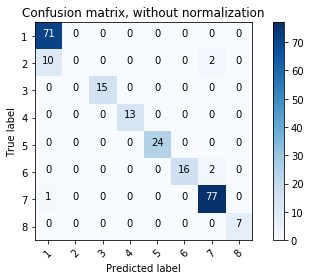

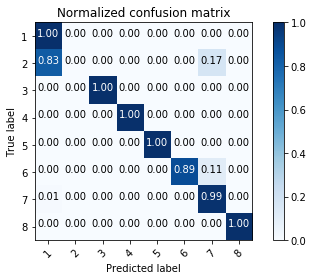

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=diagnosis_classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=diagnosis_classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
